# Canada Exports analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv(r"C:\Users\hp\Desktop\New folder\Python Object and Data Structure Basics\csv file\All Files\All Files\Canada_per_Capita.csv")
data.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [4]:
data.corr()

,year,per capita income (US$)
year,1.000000,0.943884
per capita income (US$),0.943884,1.000000


In [5]:
data.columns

Index(['year', 'per capita income (US$)'], dtype='object')

In [6]:
data.rename(columns={"per capita income (US$)":'capita', "year": 'year'}, inplace = True)

In [8]:
data.columns

Index(['year', 'capita'], dtype='object')

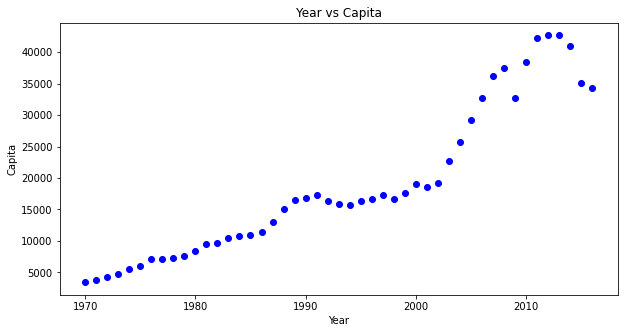

In [9]:
plt.figure(figsize=(10,5))

plt.title('Year vs Capita')
plt.xlabel('Year')
plt.ylabel('Capita')
plt.scatter(data.year, data.capita, color = 'blue')
plt.show()

In [13]:
data['year'].head(5)

0    1970
1    1971
2    1972
3    1973
4    1974
Name: year, dtype: int64

In [14]:
data['capita'].head(5)

0    3399.299037
1    3768.297935
2    4251.175484
3    4804.463248
4    5576.514583
Name: capita, dtype: float64

In [10]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [16]:
X

array([[1970],
       [1971],
       [1972],
       [1973],
       [1974],
       [1975],
       [1976],
       [1977],
       [1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016]], dtype=int64)

In [17]:
y

array([ 3399.299037,  3768.297935,  4251.175484,  4804.463248,
        5576.514583,  5998.144346,  7062.131392,  7100.12617 ,
        7247.967035,  7602.912681,  8355.96812 ,  9434.390652,
        9619.438377, 10416.53659 , 10790.32872 , 11018.95585 ,
       11482.89153 , 12974.80662 , 15080.28345 , 16426.72548 ,
       16838.6732  , 17266.09769 , 16412.08309 , 15875.58673 ,
       15755.82027 , 16369.31725 , 16699.82668 , 17310.75775 ,
       16622.67187 , 17581.02414 , 18987.38241 , 18601.39724 ,
       19232.17556 , 22739.42628 , 25719.14715 , 29198.05569 ,
       32738.2629  , 36144.48122 , 37446.48609 , 32755.17682 ,
       38420.52289 , 42334.71121 , 42665.25597 , 42676.46837 ,
       41039.8936  , 35175.18898 , 34229.19363 ])

In [18]:
print(X.shape)
print(y.shape)

(47, 1)
(47,)


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state= 0)
print(f'X_train: {X_train.shape}\nX_test: {X_test.shape}\ny_train: {y_train.shape}\ny_test: {y_test.shape}')

X_train: (35, 1)
X_test: (12, 1)
y_train: (35,)
y_test: (12,)


# Simple Linear Regression

In [21]:
rg = LinearRegression()
rg.fit(X_train, y_train)

LinearRegression()

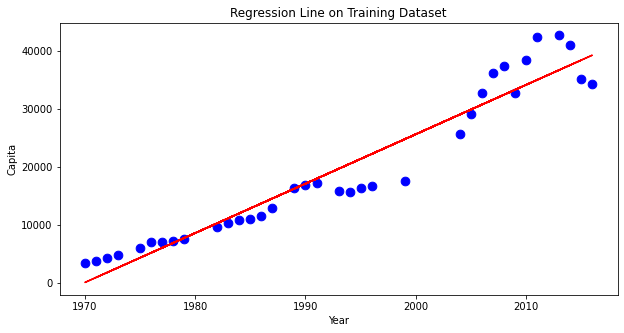

In [23]:
plt.figure(figsize=(10,5))
plt.scatter(X_train, y_train, s= 75, color= 'blue')
plt.title("Regression Line on Training Dataset")
plt.xlabel("Year")
plt.ylabel("Capita")
plt.plot(X_train, rg.predict(X_train), color='red')
plt.show()

In [25]:
y_pred = np.round(rg.predict(X_test), decimals= 2)
pd.DataFrame({'Height' : X_test[:,0], 'Actual Weight' : y_test, 'Predicted Weight': y_pred})

,Height,Actual Weight,Predicted Weight
0,1998,16622.671870,23927.34
1,2003,22739.426280,28184.79
2,2000,18987.382410,25630.32
3,1974,5576.514583,3491.57
4,1988,15080.283450,15412.43
5,1981,9434.390652,9452.00
6,2012,42665.255970,35848.21
7,2001,18601.397240,26481.81
8,1992,16412.083090,18818.40
9,1980,8355.968120,8600.51


In [26]:
print(f"Mean Absolute Error (MEA): {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Residual Sum of Squares (MSE): {metrics.mean_squared_error(y_test, y_pred)}")
print(f"R2-Score: {metrics.r2_score(y_test, y_pred)}")

Mean Absolute Error (MEA): 4420.1836775833335
Residual Sum of Squares (MSE): 28740341.363502104
R2-Score: 0.642889173207477


# Decision Tree Regressor

In [28]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

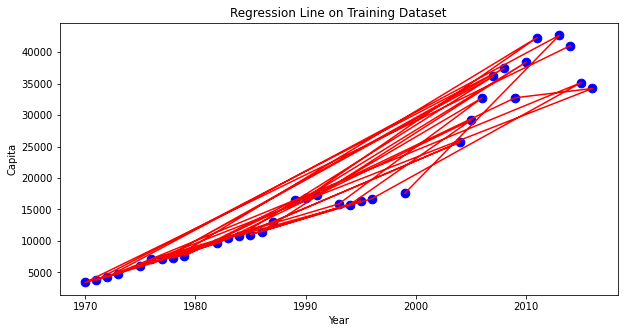

In [30]:
plt.figure(figsize=(10,5))
plt.scatter(X_train, y_train, s= 75, color= 'blue')
plt.title("Regression Line on Training Dataset")
plt.xlabel("Year")
plt.ylabel("Capita")
plt.plot(X_train, dtr.predict(X_train), color='red')
plt.show()

In [31]:
y_pred = np.round(dtr.predict(X_test), decimals= 2)

In [32]:
y_pred

array([17581.02, 25719.15, 17581.02,  4804.46, 12974.81,  9619.44,
       42334.71, 17581.02, 17266.1 ,  7602.91, 16699.83, 25719.15])

In [33]:
print(f"Mean Absolute Error (MEA): {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Residual Sum of Squares (MSE): {metrics.mean_squared_error(y_test, y_pred)}")
print(f"R2-Score: {metrics.r2_score(y_test, y_pred)}")

Mean Absolute Error (MEA): 1538.5760059166666
Residual Sum of Squares (MSE): 5144942.639069844
R2-Score: 0.9360719242544705


# Random Forest Regression

In [34]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

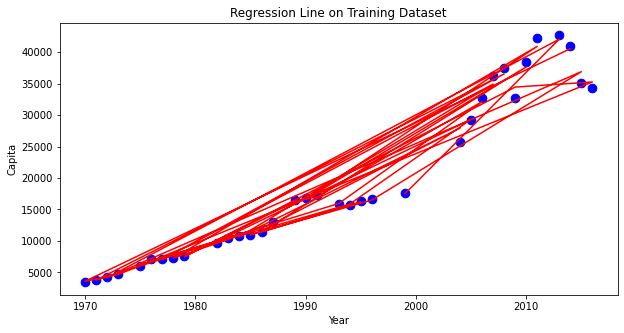

In [35]:
plt.figure(figsize=(10,5))
plt.scatter(X_train, y_train, s= 75, color= 'blue')
plt.title("Regression Line on Training Dataset")
plt.xlabel("Year")
plt.ylabel("Capita")
plt.plot(X_train, rfr.predict(X_train), color='red')
plt.show()

In [36]:
y_pred = np.round(rfr.predict(X_test), decimals= 2)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 1507.18574125
Residual Sum of Squares(MSE): 5214253.773540481
R2-Score: 0.9352107042632505


# Laaso Regression

In [37]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha= 0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

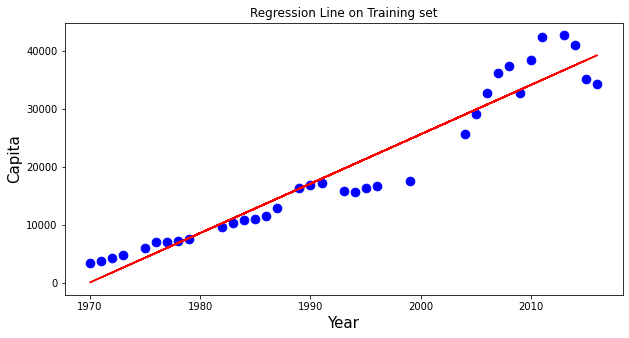

In [38]:
plt.figure(figsize=(10,5))
plt.title('Regression Line on Training set')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Capita', fontsize=15)
plt.scatter(X_train, y_train,s=75, color='blue')
plt.plot(X_train, lasso.predict(X_train), color='red')
plt.show()

In [39]:
y_pred = np.round(lasso.predict(X_test), decimals=2)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 4420.186177583334
Residual Sum of Squares(MSE): 28740350.240875717
R2-Score: 0.6428890629023769


# Ridge Regression

In [40]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha= 0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

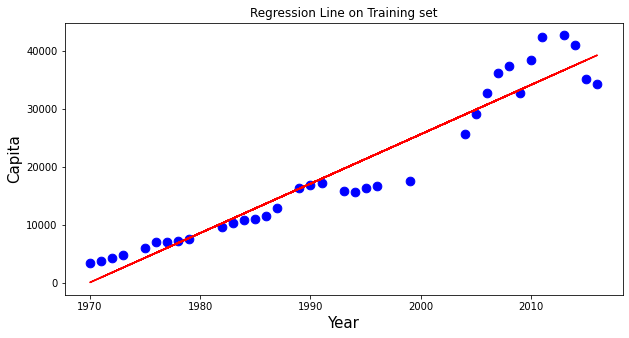

In [41]:
plt.figure(figsize=(10,5))
plt.title('Regression Line on Training set')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Capita', fontsize=15)
plt.scatter(X_train, y_train,s=75, color='blue')
plt.plot(X_train, ridge.predict(X_train), color='red')
plt.show()

In [42]:
y_pred = np.round(ridge.predict(X_test), decimals=2)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 4420.169510916666
Residual Sum of Squares(MSE): 28739926.596719485
R2-Score: 0.6428943268591609


# XG Boost Regressor

In [44]:
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

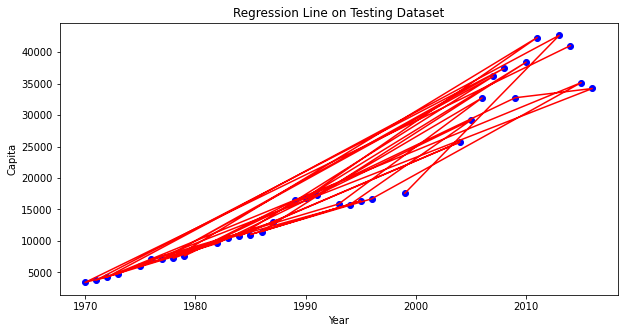

In [46]:
plt.figure(figsize=(10,5))
plt.scatter(X_train, y_train, color= 'blue')
plt.title("Regression Line on Testing Dataset")
plt.xlabel('Year')
plt.ylabel('Capita')
plt.plot(X_train, xgb.predict(X_train), color= 'red')
plt.show()

In [47]:
y_pred = np.round(xgb.predict(X_test), decimals=2)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 1393.0534367578123
Residual Sum of Squares(MSE): 4845873.510385647
R2-Score: 0.9397879839373301


# MLP Regressor

In [48]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()
mlp.fit(X_train, y_train)

MLPRegressor()

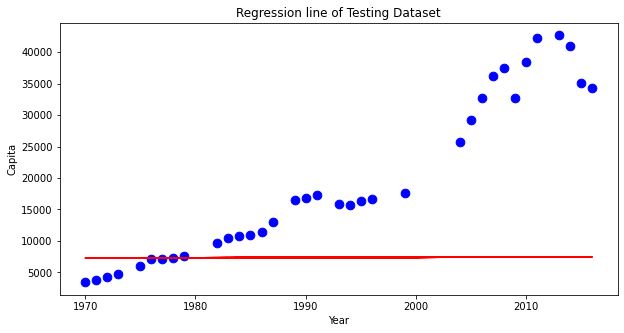

In [53]:
plt.figure(figsize=(10,5))
plt.scatter(X_train, y_train,s=75, color= 'blue')
plt.title("Regression line of Testing Dataset")
plt.xlabel('Year')
plt.ylabel('Capita')
plt.plot(X_train, mlp.predict(X_train), color= 'red')
plt.show()

In [55]:
y_pred = np.round(mlp.predict(X_test), decimals=2)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 10498.372317416666
Residual Sum of Squares(MSE): 184124567.22531447
R2-Score: -1.2878251723950758


# Gradient Boosting Regressor

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

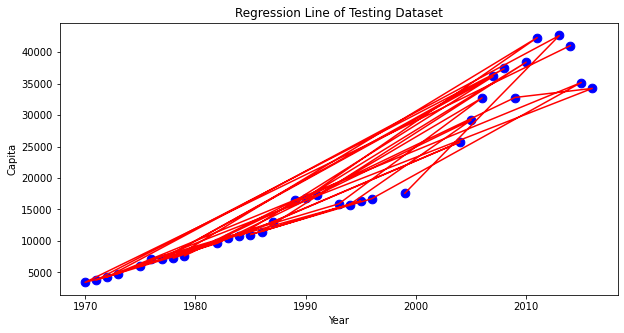

In [59]:
plt.figure(figsize=(10,5))
plt.scatter(X_train, y_train, s= 75, color= 'blue')
plt.title("Regression Line of Testing Dataset")
plt.xlabel("Year")
plt.ylabel("Capita")
plt.plot(X_train, gb.predict(X_train), color= 'red')

In [60]:
y_pred = np.round(gb.predict(X_test), decimals=2)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 1534.3551725833331
Residual Sum of Squares(MSE): 5132058.753013977
R2-Score: 0.9362320119564055


# Support Vector Machine Regressor

In [62]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train, y_train)

SVR()

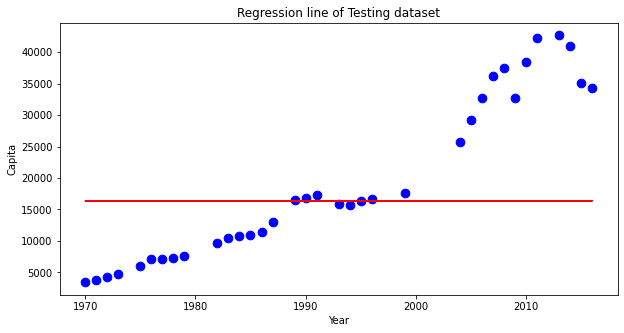

In [64]:
plt.figure(figsize= (10,5))
plt.scatter(X_train, y_train, s=75, color= 'blue')
plt.xlabel('Year')
plt.ylabel('Capita')
plt.title("Regression line of Testing dataset")
plt.plot(X_train, svm.predict(X_train), color= 'red')
plt.show()

In [65]:
y_pred = np.round(ridge.predict(X_test), decimals=2)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 4420.169510916666
Residual Sum of Squares(MSE): 28739926.596719485
R2-Score: 0.6428943268591609


# END